# WATER WELLS IN TANZANIA.

## Overview and Problem Understanding.

After careful evaluation , it has been noted that most wells in tanzania have been experiencing trouble and are faulty. 
A team of 5 was given data and told to help Navesco Company (a water company in Tanzania) to come up with eloquent data and machine understanding to come up 
with different ways in which new and improved wells would help Tanzanians stop experiencing dcrought yet water is sufficient in the country

We were able to get data from a reliable source and it will inturn be of help to us coming up with different models with different results to help in the aid of this project.


Objectives of this project include the following :
1. Build a classifier to predict the condition of a water well and pitch to an NGO focused on locating wells needing repair.


## DATA UNDERSTANDING

The data provided was divided into three different stages and levels which include the following :
1. Testing data values
2. Training data values
3. Testing labels to aid in model creation.

We are required to join the data or use the data just as it is to come up with two or more different models and explanations for the problem .

## DATA EXPLORATION.

We will begin by firstly, importing necessary libraries that will allow us to open the data and get to know what is present in our files .

In [2]:
# import necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
# open our test set data i.e all files and see the data info within the dataset
data1 = pd.read_csv("test_set_values.csv")
data1

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [5]:
#opening the training set values and seeing the information within
data2 = pd.read_csv("training_set_values.csv")
data2.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [7]:
df = pd.DataFrame(data1)

In [8]:
df1 = df.copy()

## DATA PROCESSING

Using the dataset created , we can go ahead and begin removal of duplicates and null values and even columns that may not be of help especially with our objectives in play .

In [9]:
#checking for duplicates
df1.duplicated().sum()

0

our observation is that no data is duplicated and all is well with our dataset.


In [10]:
#check for null values 
df1.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    870
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7242
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

Using the details above, we find out that most columns are  not going to be of help especially with the objectives present .So inorder to have clear colummns , we would be required to drop the unwanted columnns and also remove any null values from the needed columns.

In [11]:
#check the number of columns 
df1.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

Due to the presence of many unrequired columns , we would need to reduce them and drop the unwanted columns 


In [12]:
#drop unwanted columns
df1.drop(columns=['longitude','latitude','num_private', 'subvillage','public_meeting', 'extraction_type_class','management','payment','quantity','source','waterpoint_type','gps_height','extraction_type','water_quality','source_type','region_code','scheme_name',], inplace=True)
df1

,id,amount_tsh,date_recorded,funder,installer,wpt_name,basin,region,district_code,lga,...,scheme_management,permit,construction_year,extraction_type_group,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,DMDD,Dinamu Secondary School,Internal,Manyara,3,Mbulu,...,Parastatal,True,2012,other,parastatal,never pay,good,seasonal,surface,other
1,51630,0.0,2013-02-04,Government Of Tanzania,DWE,Kimnyak,Pangani,Arusha,2,Arusha Rural,...,VWC,True,2000,gravity,user-group,never pay,good,insufficient,groundwater,communal standpipe
2,17168,0.0,2013-02-01,NaN,NaN,Puma Secondary,Internal,Singida,2,Singida Rural,...,VWC,NaN,2010,other,user-group,never pay,good,insufficient,surface,other
3,45559,0.0,2013-01-22,Finn Water,FINN WATER,Kwa Mzee Pange,Ruvuma / Southern Coast,Lindi,43,Liwale,...,VWC,True,1987,other,user-group,unknown,good,dry,groundwater,other
4,49871,500.0,2013-03-27,Bruder,BRUDER,Kwa Mzee Turuka,Ruvuma / Southern Coast,Ruvuma,3,Mbinga,...,Water Board,True,2000,gravity,user-group,monthly,good,enough,groundwater,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,Da,Kwambwezi,Wami / Ruvu,Pwani,1,Bagamoyo,...,VWC,True,1988,mono,user-group,never pay,good,enough,surface,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,HIAP,Bonde La Mkondoa,Pangani,Tanga,7,Kilindi,...,VWC,False,1994,nira/tanira,user-group,annually,salty,insufficient,groundwater,hand pump
14847,28749,0.0,2013-03-04,NaN,NaN,Bwawani,Internal,Singida,2,Singida Rural,...,VWC,NaN,2010,gravity,user-group,never pay,good,insufficient,surface,communal standpipe
14848,33492,0.0,2013-02-18,Germany,DWE,Kwa John,Lake Nyasa,Ruvuma,2,Songea Rural,...,VWC,True,2009,gravity,user-group,never pay,good,insufficient,surface,communal standpipe


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   installer              13973 non-null  object 
 5   wpt_name               14850 non-null  object 
 6   basin                  14850 non-null  object 
 7   region                 14850 non-null  object 
 8   district_code          14850 non-null  int64  
 9   lga                    14850 non-null  object 
 10  ward                   14850 non-null  object 
 11  population             14850 non-null  int64  
 12  recorded_by            14850 non-null  object 
 13  scheme_management      13881 non-null  object 
 14  permit                 14113 non-null  object 
 15  co

In [14]:
df1.isna().sum()

id                         0
amount_tsh                 0
date_recorded              0
funder                   870
installer                877
wpt_name                   0
basin                      0
region                     0
district_code              0
lga                        0
ward                       0
population                 0
recorded_by                0
scheme_management        969
permit                   737
construction_year          0
extraction_type_group      0
management_group           0
payment_type               0
quality_group              0
quantity_group             0
source_class               0
waterpoint_type_group      0
dtype: int64

Now that we have dropped the unrequired columns and are remaining with the important ones , we will now compute and impute some of the remaining  null values present .

In [15]:
df1.fillna({'permit': 0,'funder' : 'unknown','installer':'unkown','scheme_management':'UKW'},inplace=True)
df1.isna().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
installer                0
wpt_name                 0
basin                    0
region                   0
district_code            0
lga                      0
ward                     0
population               0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type_group    0
management_group         0
payment_type             0
quality_group            0
quantity_group           0
source_class             0
waterpoint_type_group    0
dtype: int64

In [16]:
df2 = df1.copy()
df2.head()

,id,amount_tsh,date_recorded,funder,installer,wpt_name,basin,region,district_code,lga,...,scheme_management,permit,construction_year,extraction_type_group,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,DMDD,Dinamu Secondary School,Internal,Manyara,3,Mbulu,...,Parastatal,True,2012,other,parastatal,never pay,good,seasonal,surface,other
1,51630,0.0,2013-02-04,Government Of Tanzania,DWE,Kimnyak,Pangani,Arusha,2,Arusha Rural,...,VWC,True,2000,gravity,user-group,never pay,good,insufficient,groundwater,communal standpipe
2,17168,0.0,2013-02-01,unknown,unkown,Puma Secondary,Internal,Singida,2,Singida Rural,...,VWC,0,2010,other,user-group,never pay,good,insufficient,surface,other
3,45559,0.0,2013-01-22,Finn Water,FINN WATER,Kwa Mzee Pange,Ruvuma / Southern Coast,Lindi,43,Liwale,...,VWC,True,1987,other,user-group,unknown,good,dry,groundwater,other
4,49871,500.0,2013-03-27,Bruder,BRUDER,Kwa Mzee Turuka,Ruvuma / Southern Coast,Ruvuma,3,Mbinga,...,Water Board,True,2000,gravity,user-group,monthly,good,enough,groundwater,communal standpipe


## EDA ANALYSIS

### UNIVARIATE ANALYSIS

Now that the data is all cleaned and without any nnull vaalues , we will begin with the analysis section of the project . Firstly, we begin with different singular analysis between different columns and relations.

In [17]:
df2.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'installer', 'wpt_name',
       'basin', 'region', 'district_code', 'lga', 'ward', 'population',
       'recorded_by', 'scheme_management', 'permit', 'construction_year',
       'extraction_type_group', 'management_group', 'payment_type',
       'quality_group', 'quantity_group', 'source_class',
       'waterpoint_type_group'],
      dtype='object')

In [18]:
#Numerical analysis('amount_tsh')
print(df2['amount_tsh'].describe())

count     14850.000000
mean        322.826983
std        2510.968644
min           0.000000
25%           0.000000
50%           0.000000
75%          25.000000
max      200000.000000
Name: amount_tsh, dtype: float64


In [19]:
#categorical data ('payment_type')
print(df2['payment_type'].describe())

count         14850
unique            7
top       never pay
freq           6364
Name: payment_type, dtype: object


Text(0.5, 1.0, ' ')

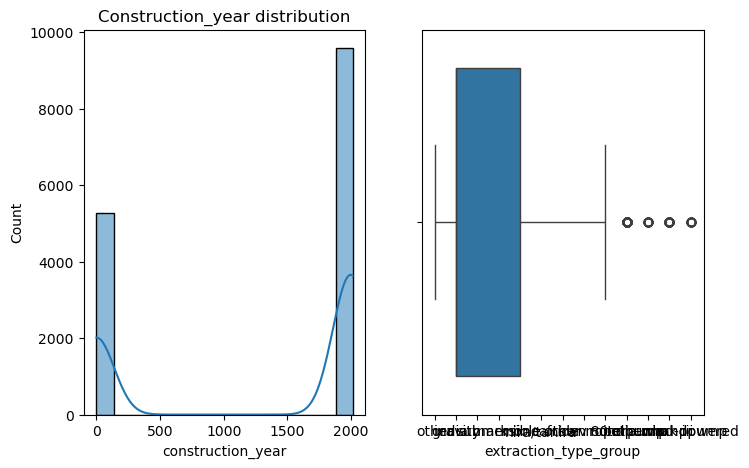

In [20]:
 #histogram for ('construction_year')
plt.figure(figsize=(8,5))

plt.subplot(1, 2, 1)
sns.histplot(df2['construction_year'], kde=True)
plt.title('Construction_year distribution')

#Boxplot for 'population'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['extraction_type_group'])
plt.title(' ')



### BIVARIATE ANALYSIS

Now on to bivariate analysis where we analyse different relationships between two data types 
i.e 1. numerical vs categorical
    2. numerical vs numerical
    3. categorical vs categorical


In [21]:
df2.describe()

,id,amount_tsh,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,9.673842,469.499332,955.241087
min,10.000000,0.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,80.000000,11469.000000,2013.000000


correlation between district_code and population:0.06642494287191568


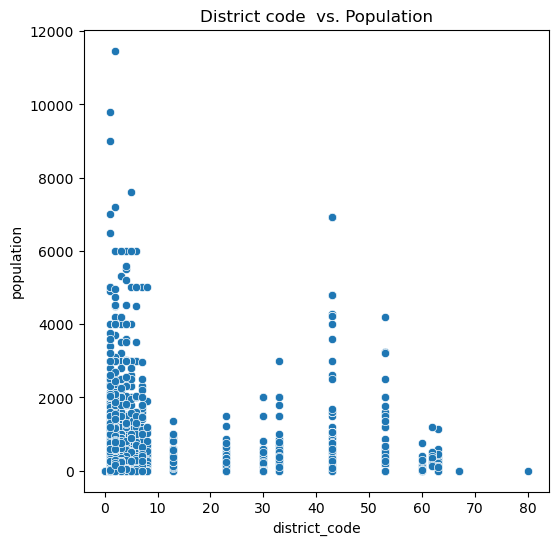

In [ ]:
#Correlation between  'district_code' and 'population'
correlation = df2['district_code'].corr(df2['population'])
print(f'correlation between district_code and population:{correlation}')

plt.figure(figsize=(6, 6))
sns.scatterplot(x='district_code', y='population', data=df)
plt.title('District code  vs. Population')
plt.show()




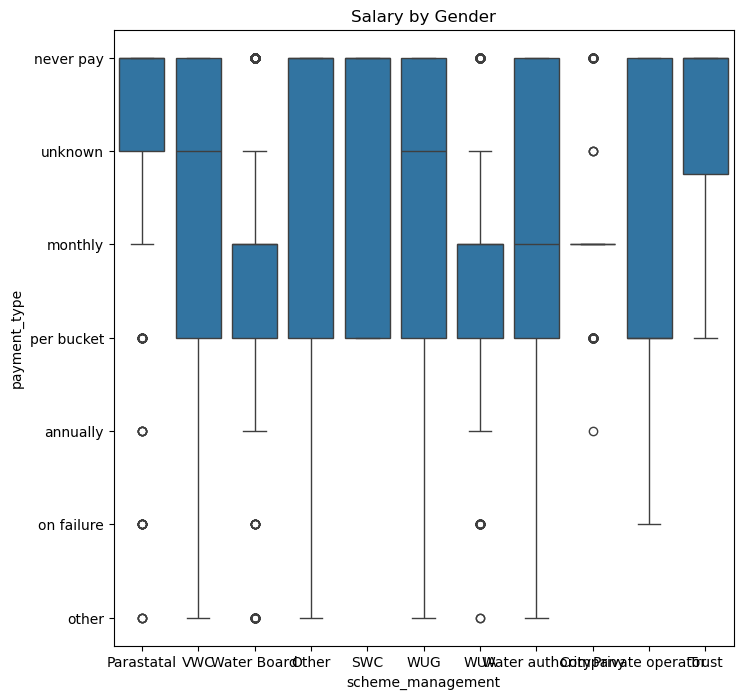

In [23]:
# Box plot for 'scheme_management' grouped by 'payment_type'
plt.figure(figsize=(8, 8))
sns.boxplot(x='scheme_management', y='payment_type', data=df)
plt.title('Salary by Gender')
plt.show()

In [36]:
#RELATIONSHIP BETWEEN COMPANY FUNDING AND AMOUNT PROVIDED
grouped = df.groupby('funder')['amount_tsh'].describe()
print(grouped)


                  count         mean          std   min   25%     50%     75%  \
funder                                                                          
0                 203.0   214.384236  2453.895265   0.0   0.0    50.0    50.0   
A/co Germany        4.0    20.000000     0.000000  20.0  20.0    20.0    20.0   
Aar                 8.0     0.000000     0.000000   0.0   0.0     0.0     0.0   
Abasia              8.0  1062.500000  1015.504801   0.0   0.0  1250.0  2000.0   
Abd                 1.0     0.000000          NaN   0.0   0.0     0.0     0.0   
...                 ...          ...          ...   ...   ...     ...     ...   
Wwf                 5.0   800.000000  1095.445115   0.0   0.0     0.0  2000.0   
Wwf / Fores         1.0     0.000000          NaN   0.0   0.0     0.0     0.0   
Zaben               1.0     0.000000          NaN   0.0   0.0     0.0     0.0   
Zao Water Spring    1.0     0.000000          NaN   0.0   0.0     0.0     0.0   
Zara Camp           1.0     

### MULTIVARIATE ANALYSIS

After careful bivariate and univariate analysis , we can begin on multivariate to ensure complete analysis on the data present.

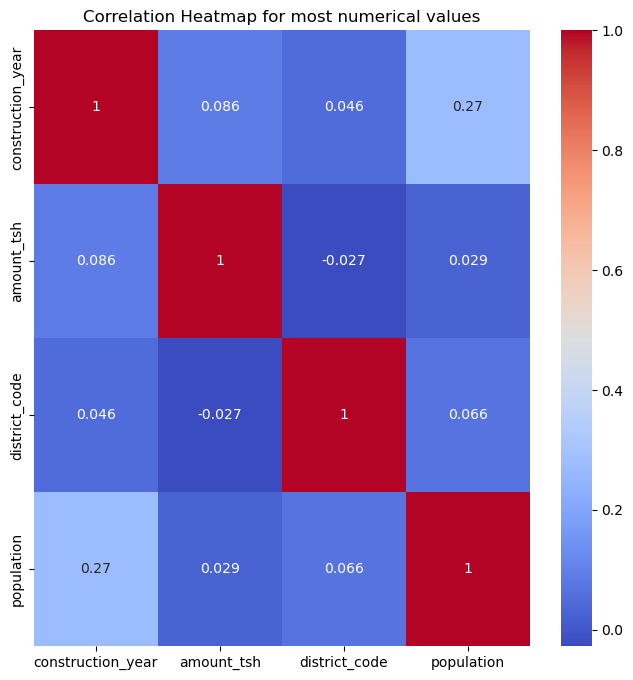

In [24]:
#for the numerical details , we will use a correlation heatmap
correlation_matrix = df[['construction_year', 'amount_tsh','district_code','population']].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for most numerical values')
plt.show()

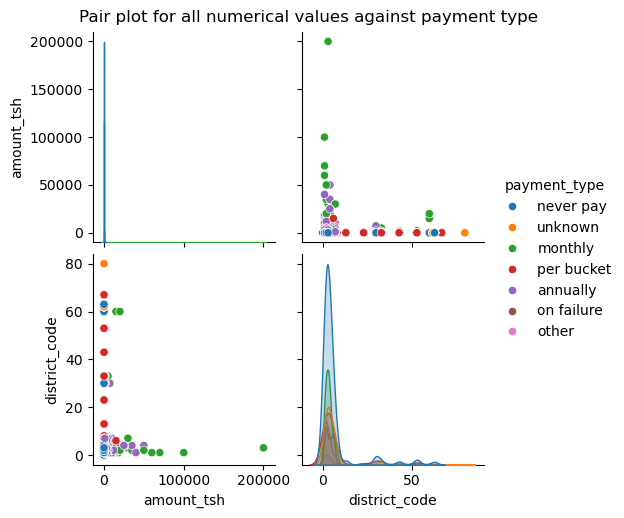

In [30]:
#pair plots for multiple numerical values
sns.pairplot(df2 ,hue = 'payment_type' , vars=['amount_tsh','district_code'])
plt.suptitle('Pair plot for all numerical values against payment type',y=1.02)
plt.show()

## MODEL AND MACHINE LEARNING.